In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_openai import ChatOpenAI
from langgraph.graph import END, START, StateGraph

model = ChatOpenAI()

In [3]:
from typing import TypedDict


class ChatMessages(TypedDict):
    question: str
    answer: str
    llm_calls: int

In [4]:
def call_model(state: ChatMessages):
    question = state["question"]
    llm_calls = state.get("llm_calls", 0)
    state["llm_calls"] = llm_calls + 1
    print("LLM_CALLS:", state["llm_calls"])
    response = model.invoke(input=question)
    state["answer"] = response.content
    return state

In [5]:
workflow = StateGraph(ChatMessages)

workflow.add_edge(START, "agent")
workflow.add_node("agent", call_model)
workflow.add_edge("agent", END)

graph = workflow.compile()

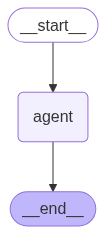

In [7]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke(input={"question": "Whats the highest mountain in the world?"})

LLM_CALLS: 1


{'question': 'Whats the highest mountain in the world?',
 'answer': 'Mount Everest',
 'llm_calls': 1}

In [9]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict


class InputState(TypedDict):
    question: str


class PrivateState(TypedDict):
    llm_calls: int


class OutputState(TypedDict):
    answer: str


class OverallState(InputState, PrivateState, OutputState):
    pass

In [10]:
workflow = StateGraph(state_schema=OverallState, input_schema=InputState, output_schema=OutputState)

workflow.add_edge(START, "agent")
workflow.add_node("agent", call_model)
workflow.add_edge("agent", END)

graph = workflow.compile()

In [11]:
graph.invoke({"question": "Whats the highest mountain in the world?"})

LLM_CALLS: 1


{'answer': 'Mount Everest is the highest mountain in the world, with a peak that reaches an elevation of 29,032 feet (8,848 meters) above sea level.'}